In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

df = pd.read_csv("/Users/college/Documents/Learn_Python/stats_101/linear_regression/Real estate.csv")

In [3]:
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [5]:
df1 = df[["X2 house age","Y house price of unit area"]]
df1.head(3)

,X2 house age,Y house price of unit area
0,32.0,37.9
1,19.5,42.2
2,13.3,47.3


In [6]:
df1 = df1.rename(columns = {"X2 house age":"house_age","Y house price of unit area":"price"})

In [7]:
x = df1[["house_age"]]
y = df1["price"]


In [8]:
# Regression line has to go through centroid

x_mean = x.mean().to_list()
x_mean = x_mean[0]

y_mean = y.mean()


print(f"centroid :{x_mean,y_mean}")



centroid = [x_mean,y_mean]

centroid :(17.71256038647343, 37.98019323671498)


In [9]:
model = LinearRegression().fit(x,y)

In [10]:
print(f"slope: {model.coef_}")
print(f"intercept: {model.intercept_}")

slope: [-0.25148842]
intercept: 42.43469704626289


In [11]:
# correlation coefficient , 𝑅
import math
r = math.sqrt(model.score(x,y))

print(f"correlation coefficient [𝑅]: {r}")

# coefficient of determination, 𝑅²
r_sq = model.score(x, y)

print(f"coefficient of determination [𝑅²]: {r_sq}")

correlation coefficient [𝑅]: 0.21056704627721715
coefficient of determination [𝑅²]: 0.04433848097791171


in this case "**house age**" explains only 4.43% [𝑅² : 0.04433848097791171 ] of variation in "**house price**"

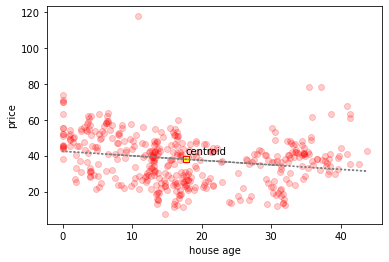

In [12]:
import matplotlib.pyplot as plt

plt.scatter(x, y,color='red', alpha=0.2)
plt.plot(x, model.predict(x),color='grey',linestyle = ":")
plt.scatter(centroid[0],centroid[1],color = "yellow", edgecolors="red", marker = "s")
plt.text(centroid[0],centroid[1]+3, "centroid", color="black")
plt.xlabel("house age")
plt.ylabel("price")
plt.show() 